In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
auto_mpg = fetch_ucirepo(id=9)
X = auto_mpg.data.features # X feature
y = auto_mpg.data.targets #y target

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [4]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


In [6]:
X.isnull().sum()

,0
displacement,0
cylinders,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0


In [7]:
X.describe()


,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,193.425879,5.454774,104.469388,2970.424623,15.568090,76.010050,1.572864
std,104.269838,1.701004,38.491160,846.841774,2.757689,3.697627,0.802055
min,68.000000,3.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,104.250000,4.000000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,148.500000,4.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,262.000000,8.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,455.000000,8.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
X['horsepower'] = X['horsepower'].fillna(X['horsepower'].mean())

<ipython-input-8-d44ee97daba0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['horsepower'] = X['horsepower'].fillna(X['horsepower'].mean())


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test_scaled)

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 8.195452104073777
R-squared (R²): 0.8475731044779435


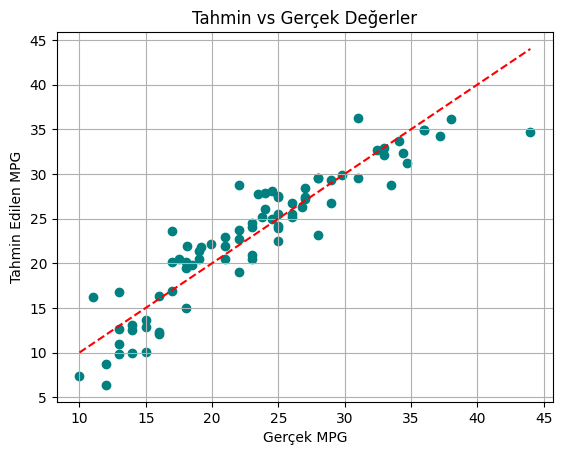

In [15]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color="teal")
plt.xlabel("Gerçek MPG")
plt.ylabel("Tahmin Edilen MPG")
plt.title("Tahmin vs Gerçek Değerler")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Doğrusal referans çizgisi
plt.grid(True)
plt.show()

# Auto MPG Prediction - Fuel Efficiency Prediction

This project applies **linear regression** model to predict fuel consumption (MPG - Miles per Gallon) of vehicles using **Auto MPG** dataset taken from **UCI Machine Learning Repository**.

## 🚗 Project Objective

The aim of the project is to predict fuel efficiency (mpg) of vehicles by looking at different features of the vehicles (such as engine size, number of cylinders, weight). This can be especially useful for those who want to improve fuel efficiency in the automobile industry.

## 📊 Methods Used

1. **Dataset:**
- Data is taken from Auto MPG dataset. This dataset contains fuel efficiency information along with various technical features of the vehicles.

2. **Pre-Processing:**
- Missing values ​​were filled with `mean`.
- Data was scaled using **StandardScaler**.

3. **Modeling:**
- **Linear Regression** model was used.
- It was divided into training and test data. The accuracy of the model was evaluated with the test data.

4. **Success Metrics:**
- **MSE (Mean Squared Error)**: The model's prediction error was calculated as 8.2.
- **R² (R-squared)**: The model was able to predict 84.7% of the data correctly.

## 🚀 Used Libraries

- `pandas`: Data analysis
- `sklearn`: Machine learning and modeling
- `matplotlib`, `seaborn`: Data visualization
- `numpy`: Mathematical calculations

## 🎯 Obtained Results

- **Model Accuracy**: The **R²** value obtained on the test data is 0.8475. This means that the model made **84.75%** accurate predictions.
- **Error Analysis**: The mean square error (MSE) was calculated as 8.2, indicating that the predictions were generally accurate.

## 📈 Application Areas of the Model

This model can be useful for car manufacturers, car buyers and those interested in environmentally friendly technologies who want to **predict** the fuel efficiency of vehicles.